# Cleaning anomalies in time series per region slug



## Load  libraries

In [20]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/soniame/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

#### Run single

In [80]:
from src.runners.clean import _run_single 

../src/utils.py:158: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


2021-04-22 13:57:20.865 | INFO     | src.runners.clean:_run_single:696 - ... here we go vitoria...

2021-04-22 13:57:20.866 | DEBUG    | src.runners.clean:_reading_data:607 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('vitoria')
        
2021-04-22 13:57:22.468 | DEBUG    | src.runners.clean:_c_param:277 - C avg: 0.5482863258149389
2021-04-22 13:57:22.472 | DEBUG    | src.runners.clean:_run_step:635 - ... step start ...
2021-04-22 13:57:22.473 | INFO     | src.runners.clean:_run_step:636 - Target variable: observed 

2021-04-22 13:57:22.473 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:57:22.475 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is tr

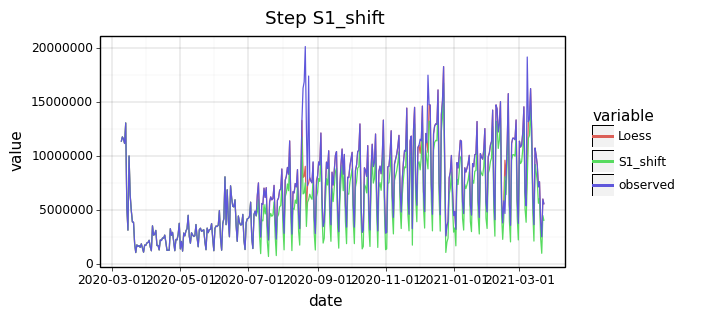

2021-04-22 13:57:23.885 | DEBUG    | src.runners.clean:_run_step:681 - ... step done ...
2021-04-22 13:57:23.892 | DEBUG    | src.runners.clean:_run_step:635 - ... step start ...
2021-04-22 13:57:23.892 | INFO     | src.runners.clean:_run_step:636 - Target variable: S1_shift 

2021-04-22 13:57:23.893 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:57:23.895 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

<ggplot: (8793659620873)>


2021-04-22 13:57:24.833 | DEBUG    | src.runners.clean:_run_shift_grid:345 - Total combinations: 25
2021-04-22 13:57:25.094 | DEBUG    | src.runners.clean:_initial_shift_date:422 - Shift found at 2020-12-08 00:00:00
2021-04-22 13:57:25.098 | DEBUG    | src.runners.clean:_shift_ts:445 - 

2021-04-22 13:57:25.101 | DEBUG    | src.runners.clean:_shift_ts:446 - Center point: -845205.7342388891
../src/runners/clean.py:450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:453: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


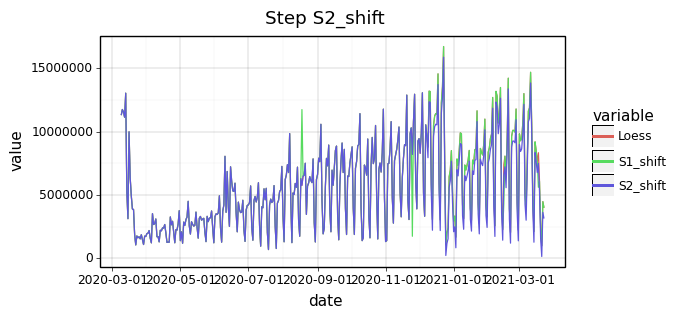

2021-04-22 13:57:25.493 | DEBUG    | src.runners.clean:_run_step:681 - ... step done ...


<ggplot: (8793663830349)>


2021-04-22 13:57:25.895 | DEBUG    | src.runners.clean:_write_missing:614 - ... writing anomalies file ...


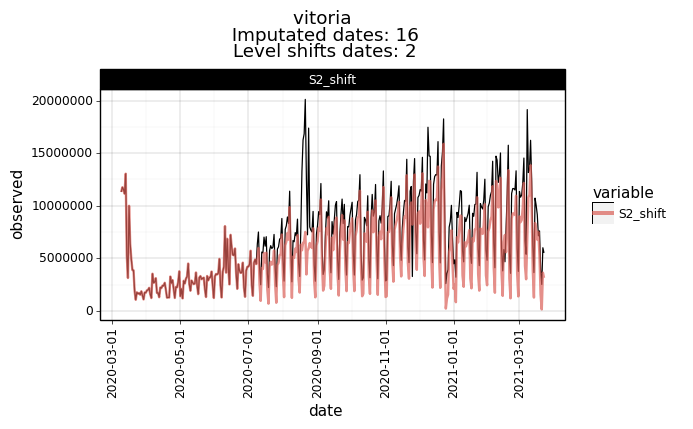

<ggplot: (8793658280585)>


/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_vitoria.pdf
2021-04-22 13:57:27.751 | INFO     | src.runners.clean:_run_single:769 - ... vitoria done ...



In [81]:
daily, weekly = _run_single(region_slug='vitoria', 
                            anomaly_vote_minimun_s1=1, 
                            anomaly_vote_minimun_s2=1, 
                            c_metric = 'avg', 
                            print_report = False, 
                            print_plot = True)

In [61]:
import plotnine as p9
p9.theme_set(p9.theme_linedraw()) # default theme

In [64]:
daily.head(3)
gg = (p9.ggplot(daily, p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red'))
#gg 

In [65]:
weekly.head(3)
gg = (p9.ggplot(weekly, p9.aes(x = 'date_min', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red'))
# gg

#### Run by batch

In [71]:
from src.runners.clean import _run_batch 

In [72]:
_run_batch(athena_path = "/home/soniame/shared/spd-sdv-omitnik-waze/corona", 
          c_metric = 'avg')

2021-04-22 13:43:56.446 | INFO     | src.runners.clean:_run_batch:783 - Total regions process81
2021-04-22 13:43:56.447 | INFO     | src.runners.clean:_run_single:691 - ... here we go aguascalientes...

2021-04-22 13:43:56.448 | DEBUG    | src.runners.clean:_reading_data:602 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('aguascalientes')
        


aguascalientes


2021-04-22 13:43:57.888 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.8545853835439359
2021-04-22 13:43:57.892 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:43:57.893 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:43:57.893 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:43:57.895 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

arequipa


2021-04-22 13:44:03.169 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.0695217471551106
2021-04-22 13:44:03.173 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:44:03.174 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:44:03.175 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:44:03.178 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

barranquilla


2021-04-22 13:44:11.086 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.3223998110960609
2021-04-22 13:44:11.089 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:44:11.090 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:44:11.090 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:44:11.092 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

belem


2021-04-22 13:44:17.452 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.5212721395923248
2021-04-22 13:44:17.456 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:44:17.457 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:44:17.457 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:44:17.459 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

belohorizonte


2021-04-22 13:44:22.872 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.5354600476942935
2021-04-22 13:44:22.876 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:44:22.877 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:44:22.877 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:44:22.879 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

bogota


2021-04-22 13:44:28.339 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.2137720971197028
2021-04-22 13:44:28.342 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:44:28.343 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:44:28.344 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:44:28.345 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

brasilia


2021-04-22 13:44:35.079 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.5801305095915957
2021-04-22 13:44:35.082 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:44:35.083 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:44:35.083 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:44:35.085 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

bucaramanga


2021-04-22 13:44:41.640 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.2979489898059222
2021-04-22 13:44:41.643 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:44:41.644 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:44:41.645 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:44:41.646 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

buenosaires


2021-04-22 13:44:50.555 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.6080372060860723
2021-04-22 13:44:50.559 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:44:50.560 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:44:50.560 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:44:50.562 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

cali


2021-04-22 13:44:55.929 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.1931955250602195
2021-04-22 13:44:55.933 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:44:55.934 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:44:55.934 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:44:55.936 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

campinas


2021-04-22 13:45:01.628 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.5580293962472695
2021-04-22 13:45:01.631 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:01.632 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:01.634 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:01.636 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

cartagena


2021-04-22 13:45:07.012 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.084687802615918
2021-04-22 13:45:07.015 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:07.016 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:07.016 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:07.018 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

cordoba


2021-04-22 13:45:12.865 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.7788667224039172
2021-04-22 13:45:12.868 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:12.869 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:12.870 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:12.870 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-22 13:45:12.900 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

country_argentina


2021-04-22 13:45:18.494 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.942448331214944
2021-04-22 13:45:18.498 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:18.499 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:18.499 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:18.501 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-22 13:45:18.530 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

country_barbados


2021-04-22 13:45:23.666 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.9581701453198248
2021-04-22 13:45:23.670 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:23.670 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:23.672 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:23.674 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

country_brazil


2021-04-22 13:45:30.355 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 3
2021-04-22 13:45:30.358 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:30.359 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:30.360 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:30.361 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021

country_chile


2021-04-22 13:45:36.981 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.8490577671585808
2021-04-22 13:45:36.984 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:36.985 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:36.986 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:36.987 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

country_colombia


2021-04-22 13:45:43.782 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.237723188918224
2021-04-22 13:45:43.787 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:43.787 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:43.788 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:43.788 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

country_costa_rica


2021-04-22 13:45:49.413 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.2318993007542614
2021-04-22 13:45:49.416 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:49.417 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:49.419 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:49.421 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

country_dominican_republic


2021-04-22 13:45:55.938 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.1779272617547305
2021-04-22 13:45:55.942 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:45:55.942 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:45:55.943 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:45:55.944 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

country_ecuador


2021-04-22 13:46:01.225 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.4740508898712683
2021-04-22 13:46:01.229 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:01.229 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:01.230 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:01.231 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

country_el_salvador


2021-04-22 13:46:06.449 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.530884165544322
2021-04-22 13:46:06.453 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:06.454 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:06.455 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:06.458 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

country_guatemala


2021-04-22 13:46:11.922 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.12564024597638
2021-04-22 13:46:11.926 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:11.927 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:11.927 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:11.929 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

country_honduras


2021-04-22 13:46:17.108 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 3
2021-04-22 13:46:17.112 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:17.113 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:17.113 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:17.115 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021

country_jamaica


2021-04-22 13:46:22.734 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.2510358261797672
2021-04-22 13:46:22.738 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:22.739 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:22.740 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:22.742 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

country_mexico


2021-04-22 13:46:29.523 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 3
2021-04-22 13:46:29.526 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:29.527 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:29.529 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:29.530 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021

country_nicaragua


2021-04-22 13:46:34.858 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 3
2021-04-22 13:46:34.861 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:34.862 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:34.863 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:34.864 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021

country_panama


2021-04-22 13:46:40.118 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 3
2021-04-22 13:46:40.122 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:40.123 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:40.123 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:40.124 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021

country_paraguay


2021-04-22 13:46:45.421 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 3
2021-04-22 13:46:45.424 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:45.425 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:45.425 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:45.427 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021

country_peru


2021-04-22 13:46:50.719 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 3
2021-04-22 13:46:50.722 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:50.723 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:50.724 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:50.725 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021

country_trinidad_and_tobago


2021-04-22 13:46:56.143 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 3
2021-04-22 13:46:56.147 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:46:56.148 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:46:56.148 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:46:56.150 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2021

country_uruguay


2021-04-22 13:47:02.751 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 3
2021-04-22 13:47:02.755 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:02.756 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:02.756 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:02.758 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-22 13:47:02.787 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

cucuta


2021-04-22 13:47:08.030 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.1469753124826465
2021-04-22 13:47:08.033 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:08.034 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:08.034 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:08.036 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-22 13:47:08.067 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

cuenca


2021-04-22 13:47:13.529 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.46803544827916
2021-04-22 13:47:13.532 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:13.533 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:13.534 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:13.535 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

curitiba


2021-04-22 13:47:19.999 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.4184419124897461
2021-04-22 13:47:20.002 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:20.003 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:20.004 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:20.005 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

fortaleza


2021-04-22 13:47:25.558 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.6344115935694901
2021-04-22 13:47:25.562 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:25.563 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:25.563 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:25.565 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

goiania


2021-04-22 13:47:31.916 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.4840117394369957
2021-04-22 13:47:31.920 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:31.920 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:31.921 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:31.922 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

guadalajara


2021-04-22 13:47:38.414 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.9683382632776852
2021-04-22 13:47:38.418 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:38.419 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:38.419 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:38.421 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

guatemala


2021-04-22 13:47:45.188 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.1255653905453942
2021-04-22 13:47:45.192 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:45.192 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:45.193 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:45.194 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

guayaquil


2021-04-22 13:47:51.585 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.9045968798841948
2021-04-22 13:47:51.588 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:51.589 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:51.589 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:51.591 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

joaopessoa


2021-04-22 13:47:57.366 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.6061241020771679
2021-04-22 13:47:57.369 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:47:57.370 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:47:57.373 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:47:57.373 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

kingston


2021-04-22 13:48:02.719 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.9001222737659175
2021-04-22 13:48:02.722 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:02.723 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:02.724 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:02.725 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

leon


2021-04-22 13:48:08.169 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.5402450051199139
2021-04-22 13:48:08.172 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:08.173 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:08.174 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:08.175 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

lima


2021-04-22 13:48:14.220 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.8592140575677221
2021-04-22 13:48:14.224 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:14.225 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:14.225 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:14.229 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

maceio


2021-04-22 13:48:19.502 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.4965060111319856
2021-04-22 13:48:19.505 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:19.506 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:19.507 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:19.508 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

managua


2021-04-22 13:48:24.851 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.7665264996177883
2021-04-22 13:48:24.855 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:24.856 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:24.858 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:24.860 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

manaus


2021-04-22 13:48:30.123 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.720556031198058
2021-04-22 13:48:30.127 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:30.128 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:30.128 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:30.130 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

medellin


2021-04-22 13:48:35.460 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.8956239601287136
2021-04-22 13:48:35.463 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:35.464 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:35.465 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:35.465 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

merida


2021-04-22 13:48:41.240 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.3953678381690564
2021-04-22 13:48:41.244 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:41.245 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:41.246 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:41.249 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

mexicocity


2021-04-22 13:48:47.700 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.8717870459453256
2021-04-22 13:48:47.704 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:47.705 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:47.705 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:47.707 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

monterrey


2021-04-22 13:48:53.171 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.7606247553246882
2021-04-22 13:48:53.175 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:53.176 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:53.176 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:53.178 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

montevideo


2021-04-22 13:48:58.552 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.4763697613730909
2021-04-22 13:48:58.556 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:48:58.556 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:48:58.559 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:48:58.559 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-22 13:48:58.588 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

natal


2021-04-22 13:49:06.346 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.6994207683582946
2021-04-22 13:49:06.350 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:49:06.350 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:49:06.351 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:49:06.352 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

panamacity


2021-04-22 13:49:12.743 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.8247260384071661
2021-04-22 13:49:12.747 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:49:12.750 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:49:12.753 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:49:12.755 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

pereira


2021-04-22 13:49:18.071 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.9194907987596652
2021-04-22 13:49:18.075 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:49:18.076 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:49:18.077 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:49:18.079 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

porto_alergre


2021-04-22 13:49:24.677 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.3886971702778639
2021-04-22 13:49:24.681 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:49:24.682 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:49:24.682 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:49:24.683 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

pueble


2021-04-22 13:49:30.241 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.7654126906628664
2021-04-22 13:49:30.245 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:49:30.245 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:49:30.246 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:49:30.247 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

queretaro


2021-04-22 13:49:35.784 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.7993896386946893
2021-04-22 13:49:35.787 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:49:35.788 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:49:35.790 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:49:35.792 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

quito


2021-04-22 13:49:42.209 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.0628671256578368
2021-04-22 13:49:42.213 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:49:42.214 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:49:42.215 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:49:42.216 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

recife


2021-04-22 13:49:48.906 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.566902337167059
2021-04-22 13:49:48.910 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:49:48.910 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:49:48.911 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:49:48.912 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

riodejaneiro


2021-04-22 13:49:54.654 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.5878759970018688
2021-04-22 13:49:54.657 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:49:54.658 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:49:54.659 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:49:54.660 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

rosario


2021-04-22 13:50:00.533 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.0404124973344724
2021-04-22 13:50:00.536 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:00.537 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:00.538 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:00.539 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

salvador


2021-04-22 13:50:05.997 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.6027247716431192
2021-04-22 13:50:06.001 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:06.001 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:06.002 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:06.003 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

sanjose


2021-04-22 13:50:11.281 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.066854995861955
2021-04-22 13:50:11.285 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:11.286 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:11.288 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:11.290 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

sanluispotosi


2021-04-22 13:50:17.770 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.8607195908545093
2021-04-22 13:50:17.773 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:17.774 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:17.775 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:17.776 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

sansalvador


2021-04-22 13:50:24.201 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.1862914816537102
2021-04-22 13:50:24.204 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:24.205 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:24.206 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:24.207 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

santacruzdelasierra


2021-04-22 13:50:30.416 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.0348336425449498
2021-04-22 13:50:30.420 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:30.420 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:30.421 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:30.422 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

santamarta


2021-04-22 13:50:35.737 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 2.2857361743435094
2021-04-22 13:50:35.741 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:35.741 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:35.742 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:35.744 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

santiago


2021-04-22 13:50:41.174 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 0.44289462125526624
2021-04-22 13:50:41.177 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:41.178 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:41.179 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:41.180 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

santiagocaballeros


2021-04-22 13:50:47.743 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.210118626399252
2021-04-22 13:50:47.746 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:47.747 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:47.748 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:47.749 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

2021-04-22 13:50:50.285 | DEBUG    | src.runners.clean:_write_missing:609 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_santiagocaballeros.pdf
2021-04-22 13:50:51.628 | INFO     | src.runners.clean:_run_single:764 - ... santiagocaballeros done ...

2021-04-22 13:50:51.629 | INFO     | src.runners.clean:_run_single:691 - ... here we go santodomingo...

2021-04-22 13:50:51.630 | DEBUG    | src.runners.clean:_reading_data:602 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('santodomingo')
        


santodomingo


2021-04-22 13:50:53.170 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.1230346655257546
2021-04-22 13:50:53.173 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:53.174 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:53.175 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:53.176 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

santos


2021-04-22 13:50:58.992 | DEBUG    | src.runners.clean:_c_param:272 - C avg: 1.0296726294779346
2021-04-22 13:50:58.996 | DEBUG    | src.runners.clean:_run_step:630 - ... step start ...
2021-04-22 13:50:58.996 | INFO     | src.runners.clean:_run_step:631 - Target variable: observed 

2021-04-22 13:50:58.998 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-22 13:50:59.000 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

saojosedoscampos


KeyboardInterrupt: 

## Temp Column names

### Daily

In [41]:
import pandas as pd
from siuba import *
df = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index.csv")
df.head()

,date,region_slug,observed,expected_2020,tcp,S1_Loess,S1_shift,S2_Loess,S2_shift,tcp_clean
0,2020-05-11,aguascalientes,767569,2182850.0,-64.836384,767569,7.675690e+05,7.675690e+05,7.675690e+05,-64.836384
1,2020-11-23,aguascalientes,1908639,2182850.0,-12.562063,1908639,1.658745e+06,1.658745e+06,1.292629e+06,-40.782500
2,2020-09-28,aguascalientes,1893878,2182850.0,-13.238289,1893878,1.643984e+06,1.643984e+06,1.277868e+06,-41.458726
3,2020-11-30,aguascalientes,2091661,2182850.0,-4.177520,2091661,1.841767e+06,1.841767e+06,1.475651e+06,-32.397957
4,2021-02-01,aguascalientes,1470383,2182850.0,-32.639302,1470383,1.220489e+06,1.220489e+06,8.543732e+05,-60.859738


In [42]:
df = df.rename(columns = {'tcp':'tcp_observed', 'observed':'tci_observed', 
                     'S2_shift':'tci_min', 'tcp_clean':'tcp_min'}) \
    .drop(columns = ['S1_Loess', 'expected_2020', 'S1_shift', 'S2_Loess']) 
df['tci_max']= df['tci_min']
df['tci_avg']= df['tci_min']

df['tcp_max']= df['tcp_min']
df['tcp_avg']= df['tcp_min']

In [44]:
df.describe()

,tci_observed,tcp_observed,tci_min,tcp_min,tci_max,tci_avg,tcp_max,tcp_avg
count,4.104000e+04,41040.000000,4.104000e+04,41040.000000,4.104000e+04,4.104000e+04,41040.000000,41040.000000
mean,3.973451e+07,-15.012948,2.781937e+07,-44.123728,2.781937e+07,2.781937e+07,-44.123728,-44.123728
std,1.347034e+08,89.891023,9.534558e+07,45.015004,9.534558e+07,9.534558e+07,45.015004,45.015004
min,1.392000e+03,-99.842676,0.000000e+00,-100.000000,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,2.734155e+06,-64.520254,1.891665e+06,-71.993130,1.891665e+06,1.891665e+06,-71.993130,-71.993130
50%,8.990222e+06,-34.405697,6.409626e+06,-52.743411,6.409626e+06,6.409626e+06,-52.743411,-52.743411
75%,2.750872e+07,2.811364,1.921969e+07,-28.302146,1.921969e+07,1.921969e+07,-28.302146,-28.302146
max,3.742041e+09,1828.225281,1.472467e+09,474.452630,1.472467e+09,1.472467e+09,474.452630,474.452630


In [45]:
df.to_csv("/home/soniame/private/daily_index_index.csv")

### Weekly

In [47]:
df = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/weekly/weekly_weekly_index.csv")
df.head()

,week,year,region_slug,date_min,date_max,observed,cleaned,expected_2020,tcp,tcp_clean
0,1,2021,aguascalientes,2021-01-04,2021-01-10,18356625,1.404456e+07,18493839.0,-0.741944,-24.058188
1,2,2021,aguascalientes,2021-01-11,2021-01-17,18405941,1.409387e+07,18493839.0,-0.475283,-23.791526
2,3,2021,aguascalientes,2021-01-18,2021-01-24,18511024,1.419896e+07,18493839.0,0.092923,-23.223321
3,4,2021,aguascalientes,2021-01-25,2021-01-31,18200981,1.388891e+07,18493839.0,-1.583544,-24.899787
4,5,2021,aguascalientes,2021-02-01,2021-02-07,17466141,1.315407e+07,18493839.0,-5.556975,-28.873219


In [49]:
df = df.rename(columns = {'tcp':'tcp_observed', 'observed':'tci_observed', 
                     'cleaned':'tci_min', 'tcp_clean':'tcp_min'}) \
    .drop(columns = ['expected_2020']) 

df['tci_max']= df['tci_min']
df['tci_avg']= df['tci_min']

df['tcp_max']= df['tcp_min']
df['tcp_avg']= df['tcp_min']

In [50]:
df.describe()

,week,year,tci_observed,tci_min,tcp_observed,tcp_min,tci_max,tci_avg,tcp_max,tcp_avg
count,6048.000000,6048.000000,6.048000e+03,6.048000e+03,6048.000000,6048.000000,6.048000e+03,6.048000e+03,6048.000000,6048.000000
mean,26.910714,2020.232143,2.696270e+08,1.887743e+08,-17.598572,-44.679135,1.887743e+08,1.887743e+08,-44.679135,-44.679135
std,15.561397,0.422235,9.027557e+08,6.349139e+08,81.849105,39.947284,6.349139e+08,6.349139e+08,39.947284,39.947284
min,1.000000,2020.000000,1.082540e+05,0.000000e+00,-98.652182,-100.000000,0.000000e+00,0.000000e+00,-100.000000,-100.000000
25%,12.750000,2020.000000,1.973382e+07,1.465035e+07,-62.795917,-69.342706,1.465035e+07,1.465035e+07,-69.342706,-69.342706
50%,26.500000,2020.000000,6.378921e+07,4.758853e+07,-33.238704,-52.215560,4.758853e+07,4.758853e+07,-52.215560,-52.215560
75%,40.250000,2020.000000,1.886384e+08,1.329434e+08,-1.914354,-30.248505,1.329434e+08,1.329434e+08,-30.248505,-30.248505
max,53.000000,2021.000000,1.931785e+10,8.296784e+09,1261.348900,268.100196,8.296784e+09,8.296784e+09,268.100196,268.100196


In [51]:
df.to_csv("/home/soniame/private/weekly_weekly_index.csv")

In [46]:
#plt.scatter(df.tcp, df.tcp_clean)
#df[['date', 'region_slug', 'tcp_clean']] 

In [26]:
df.region_slug.unique()[:5]

array(['aguascalientes', 'arequipa', 'barranquilla', 'belem',
       'belohorizonte'], dtype=object)

In [27]:
(df
 >> group_by('region_slug')
 >> summarize(min_tcp = _.tcp_clean.abs().min(),
              max_tcp = _.tcp_clean.abs().max(), 
              min_baseline = _.expected_2020.abs().min()/1e6,
              max_baseline = _.expected_2020.abs().max()/1e6,
              min_observed = _.observed.abs().min()/1e6,
              max_observed = _.observed.abs().max()/1e6,
              min_cleaned = _.S2_shift.abs().min()/1e6,
              max_cleaned = _.S2_shift.abs().max()/1e6
              )
 >> arrange(_.max_tcp)
).tail(15)

,region_slug,min_tcp,max_tcp,min_baseline,max_baseline,min_observed,max_observed,min_cleaned,max_cleaned
89,salvador,0.955091,160.335981,4.209501,31.798256,1.033705,33.612018,0.000000,32.490504
19,br_states_para,1.068860,170.844129,9.000050,23.627700,3.268988,90.694202,0.000000,40.125359
63,goiania,0.153919,175.496310,4.140577,21.031585,1.818340,25.539758,1.818340,19.271350
86,recife,0.893988,179.317727,10.753839,39.785849,2.298246,56.431478,0.000000,41.155948
73,manaus,0.160825,188.531483,4.711394,23.069681,1.474063,43.855084,0.000000,27.639117
61,curitiba,1.667522,214.583228,4.647760,28.106101,1.933182,44.337458,0.000000,23.919793
23,br_states_piaui,0.119268,219.441937,4.930524,9.167334,1.396007,38.790136,1.396007,21.061958
16,br_states_mato_grosso,0.016030,232.333721,7.124668,13.122494,2.878925,186.420794,0.000000,34.327946
17,br_states_mato_grosso_do_sul,1.114828,251.576359,7.963288,14.359315,3.396957,115.992726,0.000000,46.248651
28,br_states_roraima,0.023093,267.902111,0.714164,1.291361,0.286453,5.656422,0.000000,3.368264


#### Step run

In [ ]:
df_cty = _load_data()

In [ ]:
df_run_1 = _run_step(df_run = df_cty[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
df_run_1.head()

In [ ]:
df_run_2 = _run_step(df_run = df_run_1[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
qry = """
select 
    *
from spd_sdv_waze_corona.prod_daily_weekly_index
limit 10
"""
df = pd.read_sql_query(qry, conn)

In [ ]:
df.columns #sort_values('week_number')

In [17]:
import pandas as pd
metadata = pd.read_csv("http://tiny.cc/idb-traffic-metadata")

In [23]:
print(len(metadata.region_slug))
print(metadata.region_slug.unique())

metadata.head()

139
['country_guatemala' 'barranquilla' 'buenosaires' 'caracas'
 'br_states_maranhao' 'maracay' 'country_dominican_republic' 'saopaulo'
 'manaus' 'br_states_minas_gerais' 'montevideo' 'merida' 'ciudad_guayana'
 'br_states_amazonas' 'lapaz' 'country_peru' 'sanpedrosula'
 'country_argentina' 'br_states_rio_de_janeiro' 'cordoba'
 'country_el_salvador' 'bucaramanga' 'tijuana' 'medellin'
 'br_states_mato_grosso' 'maceio' 'br_states_pernambuco' 'guayaquil'
 'br_states_paraiba' 'country_nicaragua' 'santodomingo' 'panamacity'
 'sanfernado' 'arequipa' 'country_uruguay' 'guatemala' 'natal'
 'sanluispotosi' 'georgetown' 'br_states_santa_catarina' 'santamarta'
 'sansalvador' 'juarez' 'br_states_para' 'salvador' 'br_states_alagoas'
 'br_states_espirito_santo' 'tegucigalpa' 'country_costa_rica'
 'br_states_bahia' 'bridgetown' 'riodejaneiro' 'cucuta' 'br_states_amapa'
 'toluca' 'bogota' 'managua' 'country_honduras' 'queretaro'
 'br_states_piaui' 'leon' 'country_paraguay' 'country_guyana'
 'country_ja

,country_name,country_iso,region_slug,region_name,region_type,population,timezone,region_shapefile_wkt,osm_length,daily_coef_var,...,daily_coef_var_weekday,weekend_osm_ratio,weekday_osm_ratio,daily_approved,weekly_approved,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Guatemala,GT,country_guatemala,Guatemala,country,17915567.0,America/Guatemala,MULTIPOLYGON (((-92.2393264773401 14.541251788...,5.664239e+07,0.257001,...,0.253105,0.958859,1.153470,True,True,NaN,NaN,NaN,NaN,NaN
1,Colombia,CO,barranquilla,Barranquilla,city,1931750.0,America/Bogota,POLYGON ((-74.83374991971161 11.04958488300598...,2.609151e+06,0.316392,...,0.346008,3.327034,4.944916,True,True,NaN,NaN,NaN,NaN,NaN
2,Argentina,AR,buenosaires,Buenos Aires,city,14338718.0,America/Argentina/Buenos_Aires,POLYGON ((-58.75041764050466 -34.3670848864218...,3.033681e+07,0.326066,...,0.423715,1.914411,2.969939,True,True,NaN,NaN,NaN,NaN,NaN
3,Venezuela,VE,caracas,Caracas,city,2408266.0,America/Caracas,POLYGON ((-67.00833333335606 10.39999999997973...,3.187649e+06,0.758516,...,1.737158,0.571506,1.639975,False,False,NaN,NaN,NaN,NaN,NaN
4,Brasil,BR,br_states_maranhao,Maranhao,state,NaN,NaN,POLYGON ((-45.84073319904228 -1.04548473090940...,7.803499e+07,0.355675,...,0.421830,0.376916,0.475001,True,True,NaN,NaN,NaN,NaN,NaN


In [31]:
metadata[metadata.region_slug == 'mexicocity'].region_shapefile_wkt.to_list()

['POLYGON ((-99.22541498771096 19.79958548078565, -99.19208165656235 19.79958548078565, -99.17541499098803 19.77458547907771, -99.15041499262657 19.77458547907771, -99.15041499262657 19.73291880956447, -99.12541499426511 19.73291880956447, -99.10041499590365 19.70791880785653, -99.06708166475504 19.71625214175918, -99.06708166475504 19.69125214005124, -98.99208166967065 19.70791880785653, -98.96708167130919 19.74125214346712, -98.92541500737342 19.69958547395388, -98.95041500573488 19.69125214005124, -98.95874833852204 19.65791880444065, -98.97541500409635 19.65791880444065, -98.96708167130919 19.63291880273271, -98.94208167294772 19.63291880273271, -98.91708167458627 19.65791880444065, -98.8754150106505 19.649585470538, -98.88374834343765 19.63291880273271, -98.90874834179911 19.63291880273271, -98.88374834343765 19.61625213492741, -98.89208167622481 19.59125213321947, -98.85041501228903 19.54125212980358, -98.85041501228903 19.49958546029035, -98.8754150106505 19.47458545858241, -98.